Lima Baris Pertama Data:
    Actors Task Name Fields     CR  TD  Lostness    SUS  Polarity  Class
0  Student    Task-1     Ac  100.0   1  0.000000  62.13  Negative     -1
1  Student    Task-1     CS  100.0   2  0.491561  62.13  Negative     -1
2  Student    Task-1     CS  100.0   3  0.433333  62.13  Negative     -1
3  Student    Task-1     Ac  100.0   2  0.000000  62.13  Negative     -1
4  Student    Task-1     Mn  100.0   2  0.000000  62.13  Negative     -1

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74050 entries, 0 to 74049
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actors     74050 non-null  object 
 1   Task Name  74050 non-null  object 
 2   Fields     74050 non-null  object 
 3   CR         74050 non-null  float64
 4   TD         74050 non-null  int64  
 5   Lostness   74050 non-null  float64
 6   SUS        74050 non-null  float64
 7   Polarity   74050 non-null  object 
 8   Clas

C:\Users\Aristo Baadi\AppData\Local\Temp\ipykernel_21568\4239592646.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='pastel')


Distribusi kelas setelah SMOTE: Counter({1: 34790, -1: 34790, 0: 34790})


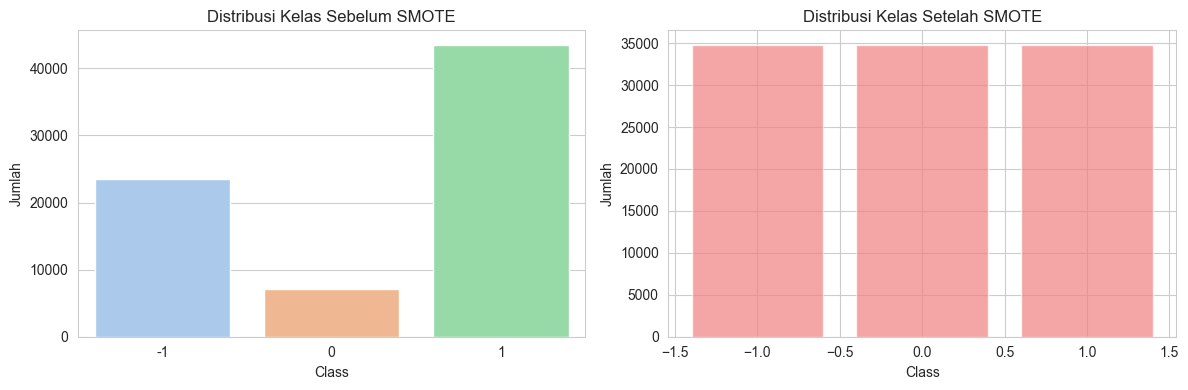

HASIL EVALUASI MODEL DENGAN SMOTE DAN 10-FOLD CV

1. Naive Bayes:
   CV Accuracy: 0.9832 (±0.0022)
   Test Accuracy: 0.9880
   CV Scores: [0.98256204 0.98246623 0.98457411 0.98323273 0.98284948 0.98409505
 0.98122066 0.98457411 0.98438249 0.9822746 ]

2. KNN:
   CV Accuracy: 0.9960 (±0.0014)
   Test Accuracy: 0.9949
   CV Scores: [0.99530516 0.99607167 0.99530516 0.99635911 0.99655073 0.99645492
 0.99444285 0.99693398 0.99655073 0.99616748]

3. Decision Tree:
   CV Accuracy: 0.9971 (±0.0008)
   Test Accuracy: 0.9953
   CV Scores: [0.99674236 0.99693398 0.99683817 0.99741305 0.99760468 0.99741305
 0.99616748 0.99712561 0.99731724 0.99750886]


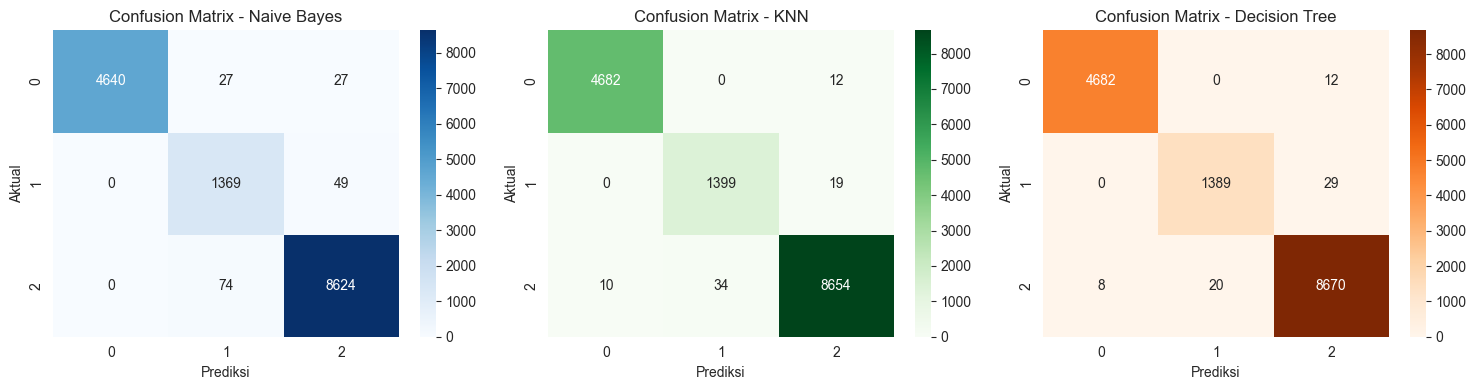


PERBANDINGAN PERFORMA MODEL
           Model  CV_Accuracy_Mean  CV_Accuracy_Std  Test_Accuracy
2  Decision Tree            0.9971           0.0004         0.9953
1            KNN            0.9960           0.0007         0.9949
0    Naive Bayes            0.9832           0.0011         0.9880


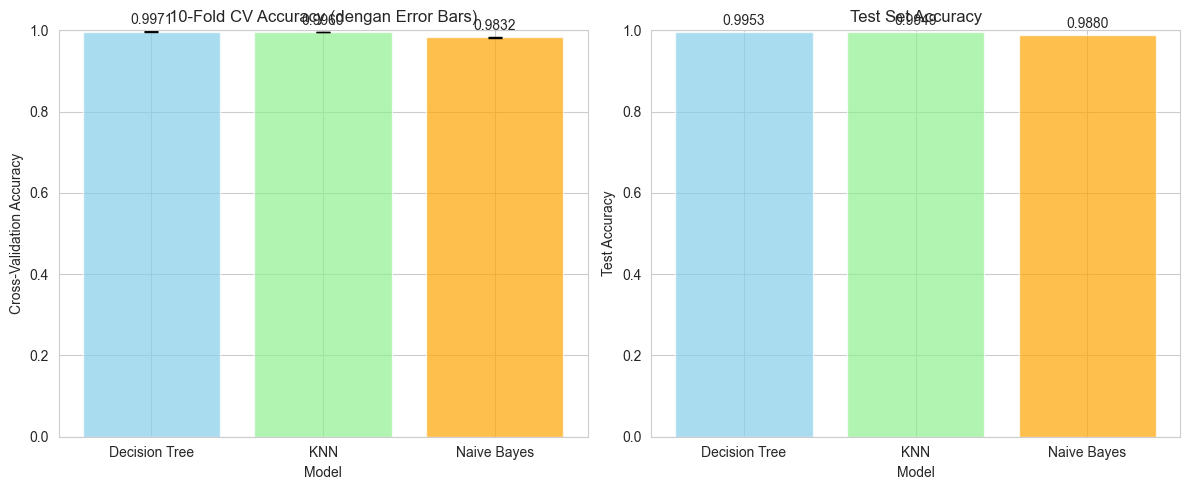


Model terbaik berdasarkan CV: Decision Tree dengan CV accuracy 0.9971
Model terbaik berdasarkan Test: Decision Tree dengan test accuracy 0.9953

Classification Report untuk Decision Tree:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      4694
           0       0.99      0.98      0.98      1418
           1       1.00      1.00      1.00      8698

    accuracy                           1.00     14810
   macro avg       0.99      0.99      0.99     14810
weighted avg       1.00      1.00      1.00     14810



In [1]:
# Analisis Menggunakan Model Machine Learning dengan SMOTE dan Cross-Validation
# 1. Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

sns.set_style('whitegrid')

# 2. Memuat dan Eksplorasi Data (EDA)
# Ganti path jika file berbeda
df = pd.read_excel('Dataset_Quiz.xlsx', sheet_name='Sheet1')

# Ubah koma menjadi titik pada kolom SUS dan konversi ke float
if df['SUS'].dtype == object:
    df['SUS'] = df['SUS'].str.replace(',', '.').astype(float)

print("Lima Baris Pertama Data:")
print(df.head())
print("\nInformasi Dataset:")
df.info()
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

# Visualisasi distribusi kelas sebelum SMOTE
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Class', data=df, palette='pastel')
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Class')
plt.ylabel('Jumlah')

# 3. Preprocessing Data
# One-hot encoding untuk fitur kategorikal
categorical_cols = ['Actors', 'Task Name', 'Fields', 'Polarity']
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Fitur dan target
y = df_processed['Class']
X = df_processed.drop('Class', axis=1)

print(f"\nDistribusi kelas sebelum SMOTE: {Counter(y)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penerapan SMOTE untuk mengatasi class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Distribusi kelas setelah SMOTE: {Counter(y_train_smote)}")

# Visualisasi distribusi kelas setelah SMOTE
plt.subplot(1, 2, 2)
unique_classes, counts = np.unique(y_train_smote, return_counts=True)
plt.bar(unique_classes, counts, color='lightcoral', alpha=0.7)
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

# 4. Pelatihan dan Evaluasi Model dengan Cross-Validation

# Setup untuk 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Model 1: Gaussian Naive Bayes
print("="*60)
print("HASIL EVALUASI MODEL DENGAN SMOTE DAN 10-FOLD CV")
print("="*60)

nb_model = GaussianNB()
# Cross-validation dengan data SMOTE
nb_cv_scores = cross_val_score(nb_model, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
nb_model.fit(X_train_smote, y_train_smote)
y_pred_nb = nb_model.predict(X_test_scaled)

print("\n1. Naive Bayes:")
print(f"   CV Accuracy: {nb_cv_scores.mean():.4f} (±{nb_cv_scores.std()*2:.4f})")
print(f"   Test Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"   CV Scores: {nb_cv_scores}")

# Model 2: KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_cv_scores = cross_val_score(knn_model, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
knn_model.fit(X_train_smote, y_train_smote)
y_pred_knn = knn_model.predict(X_test_scaled)

print("\n2. KNN:")
print(f"   CV Accuracy: {knn_cv_scores.mean():.4f} (±{knn_cv_scores.std()*2:.4f})")
print(f"   Test Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"   CV Scores: {knn_cv_scores}")

# Model 3: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
# Untuk Decision Tree, gunakan data yang tidak di-scale
X_train_smote_unscaled, _ = smote.fit_resample(X_train, y_train)
dt_cv_scores = cross_val_score(dt_model, X_train_smote_unscaled, y_train_smote, cv=cv, scoring='accuracy')
dt_model.fit(X_train_smote_unscaled, y_train_smote)
y_pred_dt = dt_model.predict(X_test)

print("\n3. Decision Tree:")
print(f"   CV Accuracy: {dt_cv_scores.mean():.4f} (±{dt_cv_scores.std()*2:.4f})")
print(f"   Test Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"   CV Scores: {dt_cv_scores}")

# Confusion Matrix untuk setiap model
models = ['Naive Bayes', 'KNN', 'Decision Tree']
predictions = [y_pred_nb, y_pred_knn, y_pred_dt]
cmaps = ['Blues', 'Greens', 'Oranges']

plt.figure(figsize=(15, 4))
for i, (model, pred, cmap) in enumerate(zip(models, predictions, cmaps)):
    plt.subplot(1, 3, i+1)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

# 5. Perbandingan dan Kesimpulan Model
results = {
    'Model': ['Naive Bayes', 'KNN', 'Decision Tree'],
    'CV_Accuracy_Mean': [
        nb_cv_scores.mean(),
        knn_cv_scores.mean(),
        dt_cv_scores.mean()
    ],
    'CV_Accuracy_Std': [
        nb_cv_scores.std(),
        knn_cv_scores.std(),
        dt_cv_scores.std()
    ],
    'Test_Accuracy': [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt)
    ]
}

comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values('CV_Accuracy_Mean', ascending=False)

print("\n" + "="*60)
print("PERBANDINGAN PERFORMA MODEL")
print("="*60)
print(comparison_df.round(4))

# Visualisasi perbandingan dengan error bars
plt.figure(figsize=(12, 5))

# Plot 1: Cross-validation accuracy dengan error bars
plt.subplot(1, 2, 1)
x_pos = np.arange(len(comparison_df))
plt.bar(x_pos, comparison_df['CV_Accuracy_Mean'],
        yerr=comparison_df['CV_Accuracy_Std'],
        capsize=5, color=['skyblue', 'lightgreen', 'orange'], alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Cross-Validation Accuracy')
plt.title('10-Fold CV Accuracy (dengan Error Bars)')
plt.xticks(x_pos, comparison_df['Model'])
plt.ylim(0, 1)

# Tambahkan nilai di atas bar
for i, (mean_acc, std_acc) in enumerate(zip(comparison_df['CV_Accuracy_Mean'], comparison_df['CV_Accuracy_Std'])):
    plt.text(i, mean_acc + std_acc + 0.01, f'{mean_acc:.4f}', ha='center', va='bottom')

# Plot 2: Test accuracy
plt.subplot(1, 2, 2)
bars = plt.bar(comparison_df['Model'], comparison_df['Test_Accuracy'],
               color=['skyblue', 'lightgreen', 'orange'], alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Set Accuracy')
plt.ylim(0, 1)

# Tambahkan nilai di atas bar
for bar, acc in zip(bars, comparison_df['Test_Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\nModel terbaik berdasarkan CV: {comparison_df.iloc[0]['Model']} dengan CV accuracy {comparison_df.iloc[0]['CV_Accuracy_Mean']:.4f}")
print(f"Model terbaik berdasarkan Test: {comparison_df.loc[comparison_df['Test_Accuracy'].idxmax(), 'Model']} dengan test accuracy {comparison_df['Test_Accuracy'].max():.4f}")

# Classification Report untuk model terbaik
best_model_idx = comparison_df.index[0]
best_model_name = comparison_df.iloc[0]['Model']
best_prediction = predictions[best_model_idx]

print(f"\nClassification Report untuk {best_model_name}:")
print(classification_report(y_test, best_prediction))

# Overfitting mulu pak, saya ga ngerti Hyperparameter tuning ;)